##Preliminary Steps

In [ ]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#Read dataset
df = pd.read_csv("/content/drive/MyDrive/students_adaptability_level_online_education.csv")

##Exploratory Data Analysis, Data Visualization, and Data Preprocessing


In [ ]:
#Setup of the data
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [ ]:
#Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


In [ ]:
#Check for null values
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
#Original shape of the data
df.shape

(1205, 14)

In [ ]:
#Display all categorical values for each feature
for columns in df:
  print(df[columns].value_counts())

Boy     663
Girl    542
Name: Gender, dtype: int64
21-25    374
11-15    353
16-20    278
1-5       81
26-30     68
6-10      51
Name: Age, dtype: int64
School        530
University    456
College       219
Name: Education Level, dtype: int64
Non Government    823
Government        382
Name: Institution Type, dtype: int64
No     901
Yes    304
Name: IT Student, dtype: int64
Yes    935
No     270
Name: Location, dtype: int64
Low     1004
High     201
Name: Load-shedding, dtype: int64
Mid     878
Poor    242
Rich     85
Name: Financial Condition, dtype: int64
Mobile Data    695
Wifi           510
Name: Internet Type, dtype: int64
4G    775
3G    411
2G     19
Name: Network Type, dtype: int64
1-3    840
3-6    211
0      154
Name: Class Duration, dtype: int64
No     995
Yes    210
Name: Self Lms, dtype: int64
Mobile      1013
Computer     162
Tab           30
Name: Device, dtype: int64
Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64


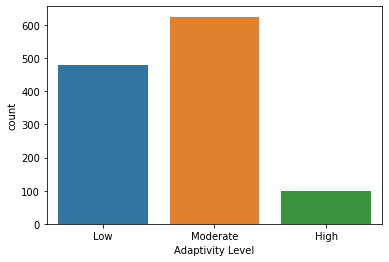

In [ ]:
#Distribution of the dependent variable
sns.countplot(data = df, x = "Adaptivity Level", order = ["Low", "Moderate", "High"])

In [ ]:
#Rename features for interpretability
df = df.rename(columns = {"Adaptivity Level": "Label", "Location": "In Town", "Load-shedding": "Electricity Load-shedding", "Self Lms": "Learning Management System"})

In [ ]:
#Variable conversion: Replace categorical values with numeric values for dependent feature
df["Label"] = df["Label"].replace(to_replace = ["Low", "Moderate", "High"], value = [0, 1, 2])

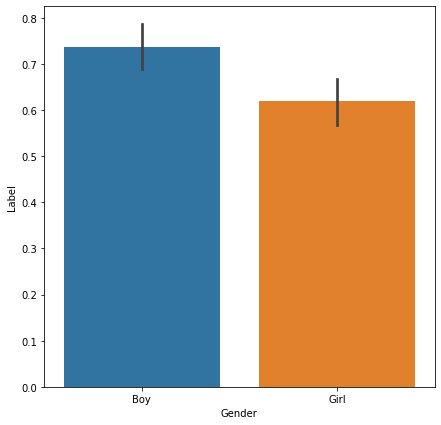

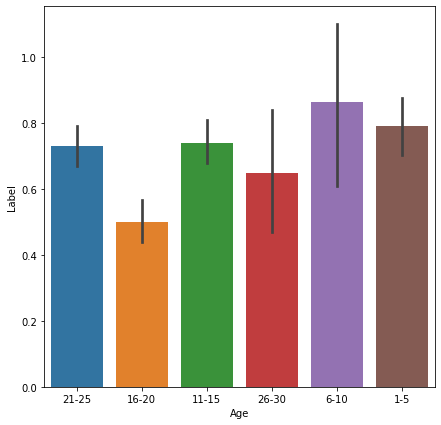

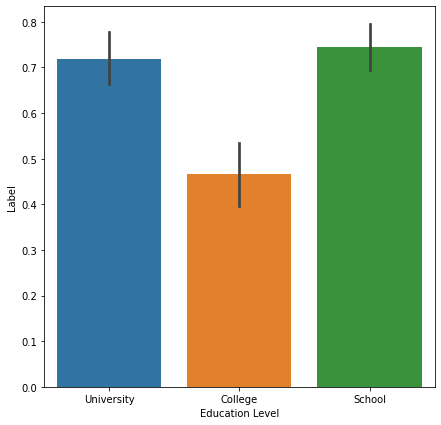

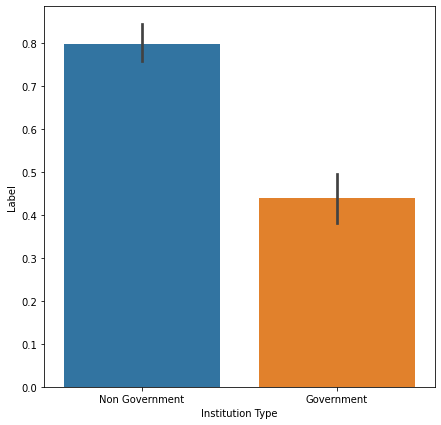

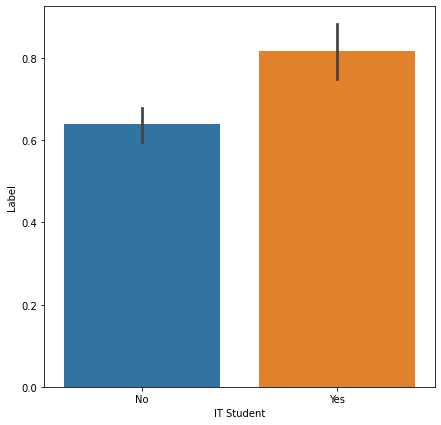

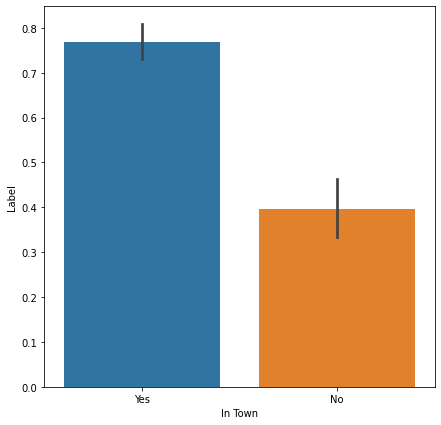

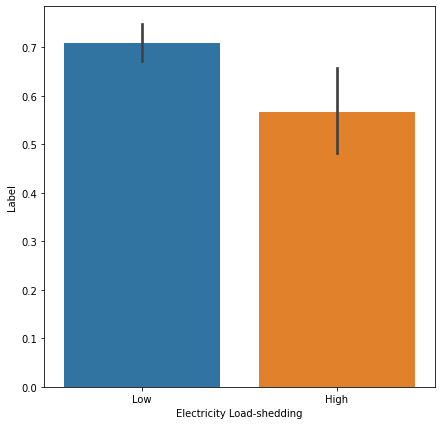

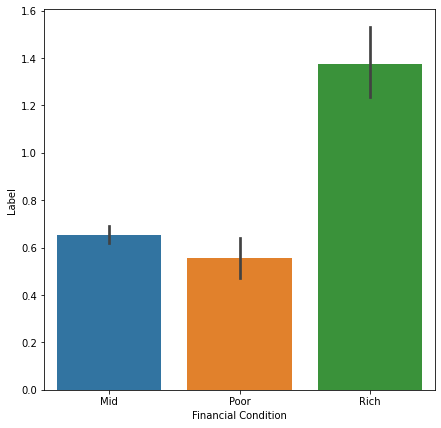

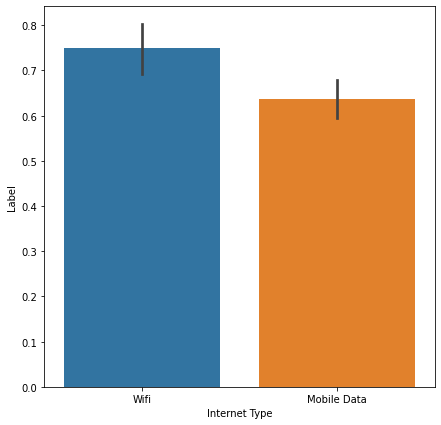

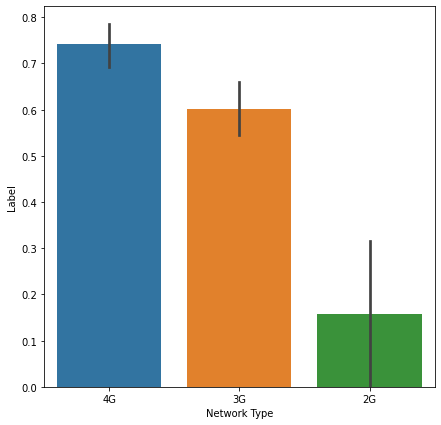

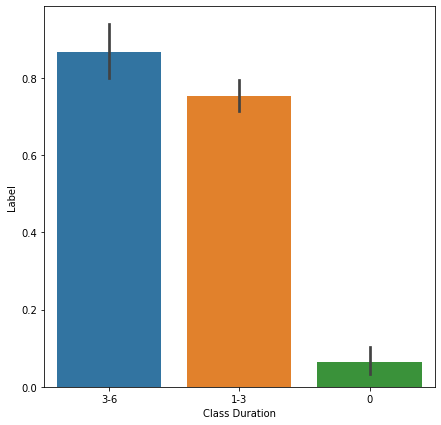

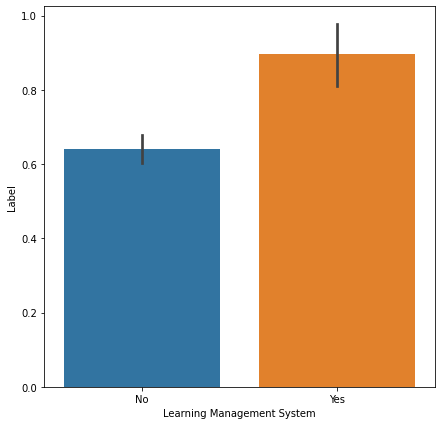

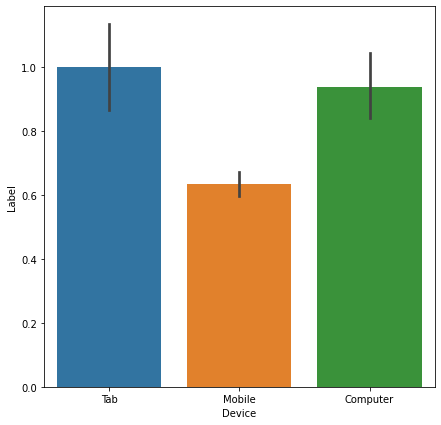

In [ ]:
#Barplot comparing all independent features to the dependent label
for columns in df:
  if columns != "Label":
    plt.figure(figsize = (7,7))
    sns.barplot(x = columns, y = df["Label"], data = df)

#Some surprising results (everything else seemed normal):

#Young kids are actually quite adaptive, while teens aren't very
#College students aren't as adaptive, while university students are
#Electricity-conditions didn't have as much of an effect as I thought

In [ ]:
#One-hot encoding for all independent features
one_hot_df = pd.get_dummies(df.iloc[:, :-1])
one_hot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Gender_Boy                       1205 non-null   uint8
 1   Gender_Girl                      1205 non-null   uint8
 2   Age_1-5                          1205 non-null   uint8
 3   Age_11-15                        1205 non-null   uint8
 4   Age_16-20                        1205 non-null   uint8
 5   Age_21-25                        1205 non-null   uint8
 6   Age_26-30                        1205 non-null   uint8
 7   Age_6-10                         1205 non-null   uint8
 8   Education Level_College          1205 non-null   uint8
 9   Education Level_School           1205 non-null   uint8
 10  Education Level_University       1205 non-null   uint8
 11  Institution Type_Government      1205 non-null   uint8
 12  Institution Type_Non Government  1205 non-null  

In [ ]:
df["Label"].value_counts()

1    625
0    480
2    100
Name: Label, dtype: int64

In [ ]:
#New DataFrame with all numeric data
new_df = pd.concat([one_hot_df, df["Label"]], axis = 1)
new_df.head()

,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,Education Level_School,...,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Learning Management System_No,Learning Management System_Yes,Device_Computer,Device_Mobile,Device_Tab,Label
0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,1
1,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,0,1,0,0,1,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
3,0,1,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,1,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
#Identify majority,minority, and in-between classes
df_minority = new_df[new_df["Label"] == 2]
df_majority = new_df[new_df["Label"] == 1]
df_middle = new_df[new_df["Label"] == 0]

#Upsample minority class by 50%
df_minority_upsampled = resample(df_minority, replace = True, n_samples = int((df_minority.shape[0] * 1.5)), random_state = 42)
#Downsample majority class to match upsampled minority class
df_majority_downsampled = resample(df_majority, replace = True, n_samples = df_minority_upsampled.shape[0], random_state = 42)
#Downsample middle class to match other two classes
df_middle_downsampled = resample(df_middle, replace = True, n_samples = df_majority_downsampled.shape[0], random_state = 42)

#New resampled DataFrame
final_df = pd.concat([df_middle_downsampled, df_majority_downsampled, df_minority_upsampled])
final_df["Label"].value_counts()

0    150
1    150
2    150
Name: Label, dtype: int64

In [ ]:
final_df = final_df.reset_index(drop = True)

In [ ]:
final_df.shape

(450, 36)

##Model Building

In [ ]:
#Setting independent and dependent variables
x = final_df.iloc[:, :35]
y = final_df["Label"]

In [ ]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 256)
rfc.fit(x_train, y_train)

#Prediction
y_pred = rfc.predict(x_test)
y_pred

array([2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 1, 1, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2,
       0, 1])

In [ ]:
#True test labels
print(list(y_test))

[2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1]


In [ ]:
#Value counts for prediction
count_0, count_1, count_2 = 0, 0, 0
for value in y_pred:
  if value == 0:
    count_0 += 1
  elif value == 1:
    count_1 += 1
  else:
    count_2 += 1

print(count_0, count_2, count_1)

34 34 22


In [ ]:
#Value counts for true test data
y_test.value_counts()

0    35
2    32
1    23
Name: Label, dtype: int64

In [ ]:
#Confusion Matrix
cfm = confusion_matrix(y_test, y_pred)
cfm
#Predicted along horizontal (0 1 2), True along vertical (0 1 2 )

array([[31,  4,  0],
       [ 3, 17,  3],
       [ 0,  1, 31]])

In [ ]:
#Accuracy
acc = accuracy_score(y_test, y_pred)
acc
#Accuracy ranges about 84% - 88%

0.8777777777777778

In [ ]:
#Evaluation report
report = classification_report(y_test, y_pred)
print(report)
#The precision, recall, and f1-score for each class 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.77      0.74      0.76        23
           2       0.91      0.97      0.94        32

    accuracy                           0.88        90
   macro avg       0.87      0.86      0.86        90
weighted avg       0.88      0.88      0.88        90



In [ ]:
#Inferences

'''
The accuracy of the model is decent. It ranges from the mid-high 80 percents. There is some blur between 0s and 1s
and between 1s and 2s, but 0s and 2s are never falsely confused with each other. This is good, as it means that cases
of extreme failure will not occur (a person with low adaptivity won't be confused with someone of high adaptivity
and vice versa). The performance measures also show quite decent results. The Random Forest Classifier (an Ensemble
Model) ended up working better than the other options, as it does well with multiclass classification. In terms of future 
changes, a different resampling method could be used, as the current method sees a lot of loss of information. In addition, 
more EDA could be conducted to compare the relationships between independent features in a heatmap or a pairplot. Finally, 
I would also look for better performance metrics when dealing with multiclass classification. This project can be used by 
institutions and online education companies to identify markets and adaptivity levels, as online education is an emerging
concept that has been quite prevalent due to the COVID-19 Pandemic.
'''

'\nThe accuracy of the model is decent. It ranges from the mid-high 80 percents. There is some blur between 0s and 1s\nand between 1s and 2s, but 0s and 2s are never falsely confused with each other. This is good, as it means that cases\nof extreme failure will not occur. \n'